<a href="https://colab.research.google.com/github/zendhiyb/prediksi-pendapatan/blob/main/Ibox_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Tugas/MACHINE LEARNING/2/dataset/dataset_ibox_lazada.csv'

df = pd.read_csv(file_path)

def clean_terjual(value):
    try:
        if isinstance(value, str):
            value = value.replace('K', '').replace(' sold', '').strip()
            if '.' in value:
                value = float(value) * 1000
            else:
                value = int(value)
        elif isinstance(value, (int, float)):
            return int(value)
        return int(value)
    except (ValueError, AttributeError):
        return 0

df['Terjual'] = df['Terjual'].apply(clean_terjual)
df['Rating'] = df['Rating'].round(1).fillna(0)
df['Review'] = pd.to_numeric(df['Review'], errors='coerce').fillna(0).astype(int)
df

,Nama Barang,Harga,Terjual,Review,Rating
0,Loops Multi Pocket Laptop Bag 16 inch - Black,99000,7,2,5.0
1,Apple iPhone 13,10249000,8500,2614,5.0
2,Loops Multi Pocket Laptop Bag 13 inch - Grey,99000,6,1,5.0
3,"Apple MacBook Air 13.6 inci, M3, 2024 (8C CPU...",16999000,0,0,0.0
4,IT Smart LED Lightstrip Extension 2M - White,50000,6,0,0.0
...,...,...,...,...,...
435,STM iPhone 16 Relax Snow,729000,0,0,0.0
436,Apple iPhone 12,7999000,536,120,5.0
437,Raptic iPhone 15 Pro AIR MagSafe,575100,0,0,0.0
438,Kajsa iPhone 15 Pro Max Glass - Transparant,543200,0,0,0.0


In [ ]:
df = df.drop_duplicates(subset='Nama Barang', keep='first')
df

,Nama Barang,Harga,Terjual,Review,Rating
0,Loops Multi Pocket Laptop Bag 16 inch - Black,99000,7,2,5.0
1,Apple iPhone 13,10249000,8500,2614,5.0
2,Loops Multi Pocket Laptop Bag 13 inch - Grey,99000,6,1,5.0
3,"Apple MacBook Air 13.6 inci, M3, 2024 (8C CPU...",16999000,0,0,0.0
4,IT Smart LED Lightstrip Extension 2M - White,50000,6,0,0.0
...,...,...,...,...,...
278,AmazingThing iPhone 15 Minimal MagSafe - Clear,949000,0,0,0.0
279,ibacks iPhone 15 Zaphire - Crystal,399200,0,0,0.0
302,Incase Sleeve For MBP/MBA Retina 13 - Navy,999000,0,0,0.0
312,Apple Pencil Pro,2499000,17,0,0.0


In [ ]:
df.dtypes

,0
Nama Barang,object
Harga,int64
Terjual,int64
Review,int64
Rating,float64


In [ ]:
output_path = '/content/drive/MyDrive/Tugas/MACHINE LEARNING/2/dataset/cleaned_dataset_ibox_lazada.csv'
df.to_csv(output_path, index=False)

output_path

'/content/drive/MyDrive/Tugas/MACHINE LEARNING/2/dataset/cleaned_dataset_ibox_lazada.csv'

In [ ]:
df['Terjual'] = df['Terjual'].apply(clean_terjual)
df['Harga'] = pd.to_numeric(df['Harga'], errors='coerce')
df['Penghasilan'] = df['Terjual'] * df['Harga']

total_penghasilan = df['Penghasilan'].sum()
total_penghasilan_rupiah = f"Rp {total_penghasilan:,.0f}"
rincian_penghasilan = df[['Nama Barang', 'Terjual', 'Harga', 'Penghasilan']]

rincian_penghasilan

<ipython-input-8-737f7751d2a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Terjual'] = df['Terjual'].apply(clean_terjual)
<ipython-input-8-737f7751d2a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Harga'] = pd.to_numeric(df['Harga'], errors='coerce')
<ipython-input-8-737f7751d2a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Nama Barang,Terjual,Harga,Penghasilan
0,Loops Multi Pocket Laptop Bag 16 inch - Black,7,99000,693000
1,Apple iPhone 13,8500,10249000,87116500000
2,Loops Multi Pocket Laptop Bag 13 inch - Grey,6,99000,594000
3,"Apple MacBook Air 13.6 inci, M3, 2024 (8C CPU...",0,16999000,0
4,IT Smart LED Lightstrip Extension 2M - White,6,50000,300000
...,...,...,...,...
278,AmazingThing iPhone 15 Minimal MagSafe - Clear,0,949000,0
279,ibacks iPhone 15 Zaphire - Crystal,0,399200,0
302,Incase Sleeve For MBP/MBA Retina 13 - Navy,0,999000,0
312,Apple Pencil Pro,17,2499000,42483000


In [ ]:
total_penghasilan_rupiah

'Rp 93,913,475,000'

In [ ]:
top_10_penghasilan = df[['Nama Barang', 'Terjual', 'Harga', 'Penghasilan']].sort_values(by='Penghasilan', ascending=False).head(10)

top_10_penghasilan

,Nama Barang,Terjual,Harga,Penghasilan
1,Apple iPhone 13,8500,10249000,87116500000
5,Apple iPhone 12,536,7999000,4287464000
15,Apple 20W USB-C Power Adapter,2400,479000,1149600000
134,Apple AirPods with Charging Case (Gen 2),460,1899000,873540000
64,Apple AirPods Pro (generasi ke-2) dengan USB-C,85,3599000,305915000
67,IT Plug IT 30W Cube - White,337,199000,67063000
154,Apple iPhone 15 Clear Case with MagSafe,41,1049000,43009000
312,Apple Pencil Pro,17,2499000,42483000
73,Lightning to 3.5 mm Headphone Jack Adapter,39,249000,9711000
149,Uniq iPhone 16 / 16 Plus MagSafe Clearick LifePro,12,499000,5988000


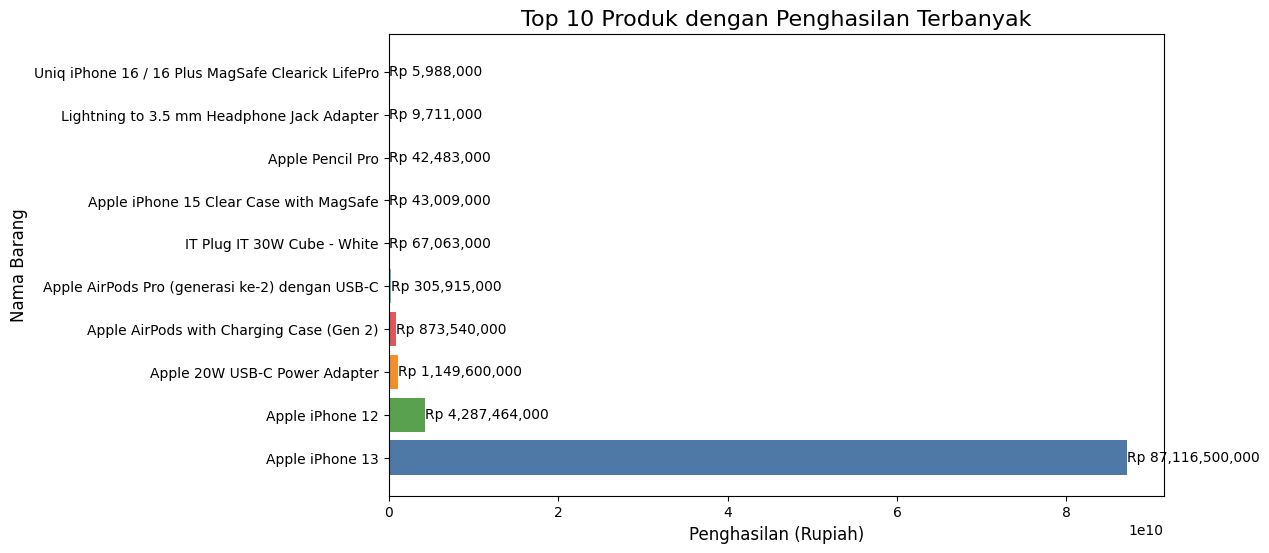

In [ ]:
import matplotlib.pyplot as plt

top_10_penghasilan = df[['Nama Barang', 'Terjual', 'Harga', 'Penghasilan']].sort_values(by='Penghasilan', ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Membuat bar chart
plt.barh(top_10_penghasilan['Nama Barang'], top_10_penghasilan['Penghasilan'],
         color=['#4E79A7', '#59A14F', '#F28E2B', '#E15759', '#76B7B2',
                '#FF9DA7', '#9C755F', '#B07AA1', '#FF6D76', '#FF9C68'])

# Menambahkan judul dan label
plt.title('Top 10 Produk dengan Penghasilan Terbanyak', fontsize=16)
plt.xlabel('Penghasilan (Rupiah)', fontsize=12)
plt.ylabel('Nama Barang', fontsize=12)

# Menampilkan nilai penghasilan dalam format mata uang Rupiah di samping batang
for index, value in enumerate(top_10_penghasilan['Penghasilan']):
    plt.text(value, index, f'Rp {value:,.0f}', va='center', fontsize=10, color='black')

plt.show()


In [ ]:
df = df[df['Penghasilan'] != 0]
pengujian = df[['Terjual', 'Harga', 'Penghasilan']]
pengujian

,Terjual,Harga,Penghasilan
0,7,99000,693000
1,8500,10249000,87116500000
2,6,99000,594000
4,6,50000,300000
5,536,7999000,4287464000
15,2400,479000,1149600000
64,85,3599000,305915000
67,337,199000,67063000
71,15,269000,4035000
73,39,249000,9711000


In [ ]:
X = pengujian.drop('Penghasilan', axis=1)  # Fitur
y = pengujian['Penghasilan']               # Target

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Buat dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter untuk Random Forest
parameters = [
    {"n_estimators": 10, "max_depth": 5},
    {"n_estimators": 50, "max_depth": 10},
    {"n_estimators": 100, "max_depth": 15},
    {"n_estimators": 200, "max_depth": None},
]

# Latih model dan prediksi
results = []
for param in parameters:
    # Inisialisasi model Random Forest dengan parameter tertentu
    model = RandomForestRegressor(n_estimators=param['n_estimators'], max_depth=param['max_depth'], random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Simpan hasil dalam list
    results.append({
        "n_estimators": param['n_estimators'],
        "max_depth": param['max_depth'],
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R^2 Score": r2
    })

# Konversi hasil ke pandas DataFrame
df_results = pd.DataFrame(results)

# Tampilkan tabel
df_results


,n_estimators,max_depth,Mean Absolute Error,Mean Squared Error,R^2 Score
0,10,5.0,1.316453,2.528426,0.995762
1,50,10.0,0.966858,1.318596,0.997790
2,100,15.0,0.921960,1.198018,0.997992
3,200,NaN,0.968629,1.281047,0.997853


In [ ]:
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
-cv_results.mean()

2.992520864408596